In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:/Users/usnis/OneDrive/Masaüstü/Python_Workspace/magaza_yorumlari_duygu_analizi.csv", encoding ="utf-16")


In [2]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [ ]:
data=data.dropna()

In [4]:
eksik_veri_sayisi=data.isnull().sum()

In [5]:
eksik_veri_sayisi

Görüş    0
Durum    0
dtype: int64

In [6]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [7]:
data.columns

Index(['Görüş', 'Durum'], dtype='object')

In [8]:
data["Durum"].value_counts()

Durum
Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: count, dtype: int64

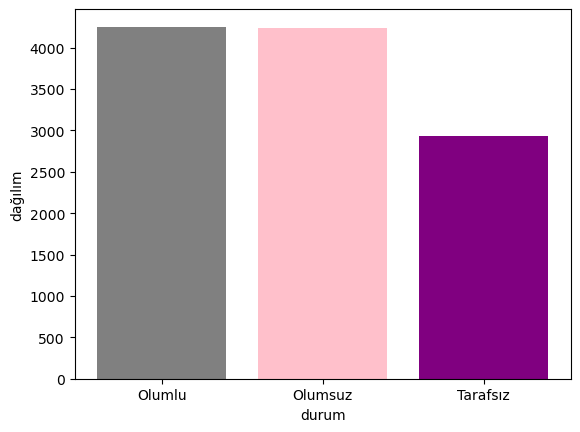

In [9]:
durum_sayilari=data["Durum"].value_counts()
plt.bar(durum_sayilari.index,durum_sayilari.values, color=["gray","pink","purple"])
plt.xlabel("durum")
plt.ylabel("dağılım")
plt.show()

In [10]:
data["Durum"]=data.loc[:,"Durum"].map({"Olumlu":0, "Olumsuz":1, "Tarafsız":2})

In [57]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1


In [58]:
data["Görüş"][4]

"Kulaklığın sesi kaliteli falan değil. Aleti öve öve bitiremeyen yorumlar şüpheli. Tizler yok gibi ve olan da boğuk çıkıyor. Bas, kaba saba, ben buradayım diyor ama kalite yok. İyi ses arayanlara tavsiye etmem. Hayatımda aldığım ilk Snopy marka üründü, onu da bazı yorumlara güvenerek aldım ve pişman oldum. Hepsiburada'nın sahte yorumlara karşı önlem alması gerekiyor artık."

In [59]:
import re
cumle0=data["Görüş"][4]
cumle1=re.sub("[^a-zA-ZşŞçÇöÖüÜıİğĞ]"," ",cumle0)

In [60]:
cumle1

'Kulaklığın sesi kaliteli falan değil  Aleti öve öve bitiremeyen yorumlar şüpheli  Tizler yok gibi ve olan da boğuk çıkıyor  Bas  kaba saba  ben buradayım diyor ama kalite yok  İyi ses arayanlara tavsiye etmem  Hayatımda aldığım ilk Snopy marka üründü  onu da bazı yorumlara güvenerek aldım ve pişman oldum  Hepsiburada nın sahte yorumlara karşı önlem alması gerekiyor artık '

In [61]:
cumle2=cumle1.lower()
cumle2

'kulaklığın sesi kaliteli falan değil  aleti öve öve bitiremeyen yorumlar şüpheli  tizler yok gibi ve olan da boğuk çıkıyor  bas  kaba saba  ben buradayım diyor ama kalite yok  i̇yi ses arayanlara tavsiye etmem  hayatımda aldığım ilk snopy marka üründü  onu da bazı yorumlara güvenerek aldım ve pişman oldum  hepsiburada nın sahte yorumlara karşı önlem alması gerekiyor artık '

In [62]:
import nltk 
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usnis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usnis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
cumle3=nltk.word_tokenize(cumle2)

In [64]:
cumle4=[word for word in cumle3 if not word in set(stopwords.words("turkish"))]

In [65]:
len(cumle3)

57

In [66]:
len(cumle4)

50

In [67]:
stopwords.words("turkish")

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [68]:
cumle5=" ".join(cumle4)

In [69]:
cumle5

'kulaklığın sesi kaliteli falan değil aleti öve öve bitiremeyen yorumlar şüpheli tizler yok olan boğuk çıkıyor bas kaba saba ben buradayım diyor kalite yok i̇yi ses arayanlara tavsiye etmem hayatımda aldığım ilk snopy marka üründü onu yorumlara güvenerek aldım pişman oldum hepsiburada nın sahte yorumlara karşı önlem alması gerekiyor artık'

In [102]:
def harfdegistir(cumle):
    #belirlenen karakterler haricindekileri sil
    cumle=re.sub("[^a-zA-ZşŞçÇöÖüÜıİğĞ]"," ",cumle)
    #tümünü küçük harf yap
    cumle=cumle.lower()
    # cümleye split metodu uygula
    cumle=nltk.word_tokenize(cumle)
    #stop wordsleri çıkart
    cumle=[word for word in cumle if not word in set(stopwords.words("turkish"))]
    # kelimeleri tekrar birleştir
    cumle=" ".join(cumle)
    return cumle

In [103]:
len(data["Görüş"])

11426

In [104]:
x=data["Görüş"].values

In [105]:
len(x)

11426

In [106]:
son_gorus=[]
for i in range(len(x)):
    x1=harfdegistir(x[i])
    son_gorus.append(x1)

In [107]:
son_gorus[125]

'ürün önce elime geçti buradan aldım kargoyu zamanında yolladıkları teşekkür ediyorum ürün hayal kırıklığı pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum yinede tavsiye etmiyorum'

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=2500
cv=CountVectorizer(max_features=max_features,stop_words=stopwords.words("turkish"))
space_matrix=cv.fit_transform(son_gorus).toarray()

In [109]:
print("en sık kullanılan sözcükler" ,max_features,cv.get_feature_names_out())

en sık kullanılan sözcükler 2500 ['acayip' 'acil' 'adam' ... 'şöyle' 'şükür' 'şık']


In [110]:
space_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
x=space_matrix
y=data.iloc[:,1].values

In [112]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=22)

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=23)

In [144]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=20, random_state=23)

In [145]:
ypred=rf.predict(xtest)

In [146]:
ypred

array([0, 1, 0, ..., 0, 1, 2], dtype=int64)

In [147]:
ytest

array([2, 1, 2, ..., 0, 1, 2], dtype=int64)

In [148]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,ypred)
cm

array([[698, 146,   5],
       [116, 703,  28],
       [267, 271,  52]], dtype=int64)

In [149]:
accuracy_score(ytest,ypred)

0.6356080489938758

In [154]:
def giris_cumlesi_siniflandir(cumle):
    temiz_cumle=harfdegistir(cumle)
    vector=cv.transform([temiz_cumle]).toarray()
    tahmin=rf.predict(vector)
    
    if tahmin==0:
        print("olumlu görüş")
        
    elif tahmin==1:
        print("olumsuz görüş")
        
    else:
        print("tarafsız görüş")
        
ornek_cumle="Rezervasyon yaptırdıktan sonra birisi beni aradı ve havuz görem odaya geçmek ister misiniz diye sordu, olur dedim. 3 odalı rezervasyonu 2 odalıyla değişmişler bir de yataklar 130 cm filen asla iki kişi yanyana yatamaz. Evde 5 kişi kalmayı planlarken 3 kişi anca kalabildik!! Havuz gören oda değil, arayı kapatmışlar, aşırı basık , bir villanın alt katını vermişler !! Kahve makinasının içi küf doluydu. Asla parasını haketmeyen bir yer ."
giris_cumlesi_siniflandir(ornek_cumle)

olumsuz görüş
